# 6. Clustering

### 0. List of Contents
#### 1. Importing Libraries and Dataframes
#### 2. Determing the Number of Clusters with the Elbow Technique
#### 3. Clustering with k-means

#### I have added regions and subregions based on the UN catgegories to the original dataset, and I want to see if I get the same result with clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Creating path
path=r'/Users/fru.s/Documents/CF - Data Analytics/2.6. Sourcing Open Data/Open Source Data Analysis/02 Data/Prepared Data/'

In [4]:
# Import the same data as for the regression, but the already cleaned versiob
em_cm = pd.read_pickle(os.path.join(path, 'em_cm_no_dups.pkl'))

In [5]:
em_cm.shape

(61042, 9)

In [6]:
em_cm.head(10)

,Country or area,YearStart,YearEnd,Sex,AgeGroup,Ever_Married_%,Currently_Married_%,Region Name,Sub-region Name
0,Afghanistan,1972,1974,Men,[15-19],7.7,7.6,Asia,Southern Asia
1,Afghanistan,1972,1974,Men,[20-24],32.6,31.9,Asia,Southern Asia
2,Afghanistan,1972,1974,Men,[25-29],61.4,59.1,Asia,Southern Asia
3,Afghanistan,1972,1974,Men,[30-34],83.0,78.9,Asia,Southern Asia
4,Afghanistan,1972,1974,Men,[35-39],91.2,87.2,Asia,Southern Asia
5,Afghanistan,1972,1974,Men,[40-44],94.1,89.7,Asia,Southern Asia
6,Afghanistan,1972,1974,Men,[45-49],96.3,90.7,Asia,Southern Asia
7,Afghanistan,1972,1974,Men,[50-54],98.3,91.5,Asia,Southern Asia
8,Afghanistan,1972,1974,Men,[55-59],98.5,91.5,Asia,Southern Asia
9,Afghanistan,1972,1974,Men,[60-64],97.9,85.4,Asia,Southern Asia


### 2. Determing the Number of Clusters with the Elbow Technique

In [8]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [9]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(em_cm).score(em_cm) for i in range(len(kmeans))]
score

ValueError: could not convert string to float: 'Afghanistan'

In [10]:
# I believe this means I need to drop the categorical columns
em_cm_nogeo= em_cm.drop(columns = ['Country or area','Sex','AgeGroup','Region Name','Sub-region Name'])

In [11]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(em_cm_nogeo).score(em_cm_nogeo) for i in range(len(kmeans))]
score

[-142550647.68214864,
 -50000483.02371292,
 -35871500.5922418,
 -26966728.225948453,
 -22637306.77371802,
 -19365979.655962184,
 -16831626.183429155,
 -15021467.377776952,
 -13368052.215522664]

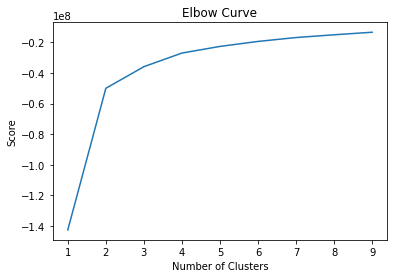

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The big jump is up to 2 clusters, could that be the original men and women cluster? But there is still a slighter rise between 2 and 4, so I want to see what happens when I select 4 cluster

### 3. Clustering with k-means

In [26]:
# Create the k-means object
kmeans = KMeans(n_clusters = 4) 

In [27]:
# Fitting the k-means object to the data
kmeans.fit(em_cm_nogeo)

KMeans(n_clusters=4)

In [28]:
em_cm_nogeo['clusters'] = kmeans.fit_predict(em_cm_nogeo)

In [29]:
em_cm_nogeo.head(20)

,YearStart,YearEnd,Ever_Married_%,Currently_Married_%,clusters
0,1972,1974,7.7,7.6,1
1,1972,1974,32.6,31.9,1
2,1972,1974,61.4,59.1,2
3,1972,1974,83.0,78.9,2
4,1972,1974,91.2,87.2,2
5,1972,1974,94.1,89.7,2
6,1972,1974,96.3,90.7,2
7,1972,1974,98.3,91.5,2
8,1972,1974,98.5,91.5,2
9,1972,1974,97.9,85.4,2


In [30]:
em_cm_nogeo['clusters'].value_counts()

0    23265
2    15268
1    11542
3    10967
Name: clusters, dtype: int64

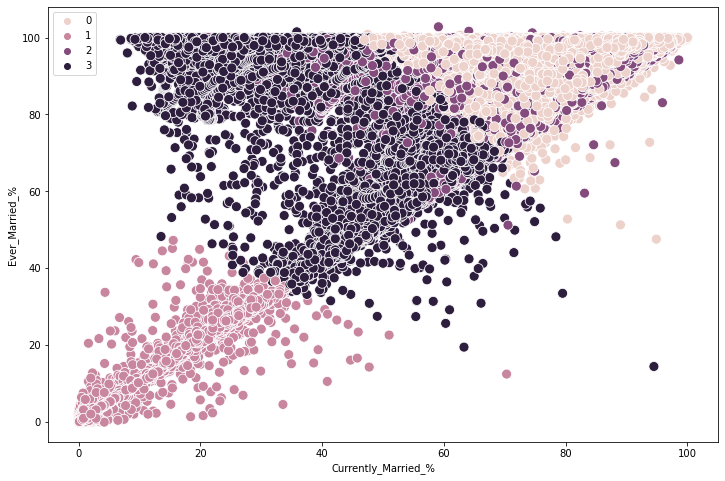

In [31]:
# Plot the clusters for the "Ever_Married_%" and "Currently_Married_%" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=em_cm_nogeo['Currently_Married_%'], y=em_cm_nogeo['Ever_Married_%'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Currently_Married_%') # Label x-axis.
plt.ylabel('Ever_Married_%') # Label y-axis.
plt.show()

#### So the 4 groups I see as clusters:
#### Mauve in in the left bottom quadrant: where most of the data points are below 40% currently and 40% ever married
#### Black: the majority of the Currently Married data points are between 70, and the ever married is between 30 to 100. When a data point is above EM 30 and starts to grow, then the CM value grows too, but once EM reaches 70, the CM starts to decrease
#### Light Pink: These data points have the highest value CM, but not neccesarily the highest value for EM, there is a very nice symmetry to it, it looks like a triangle
#### Dar Purple: these value points are covered by the light pink and dark purple data points, and also compleletely mixed with them, it is hard to see any unique pattern. Maybe three clusters, should have been enough. I'll rerun the process accordingly

In [20]:
# Create the k-means object with 3 cluster
kmeans = KMeans(n_clusters = 3) 

In [21]:
# Fitting the k-means object to the data
kmeans.fit(em_cm_nogeo)

KMeans(n_clusters=3)

In [22]:
em_cm_nogeo['clusters'] = kmeans.fit_predict(em_cm_nogeo)

In [23]:
em_cm_nogeo.head(20)

,YearStart,YearEnd,Ever_Married_%,Currently_Married_%,clusters
0,1972,1974,7.7,7.6,1
1,1972,1974,32.6,31.9,1
2,1972,1974,61.4,59.1,2
3,1972,1974,83.0,78.9,2
4,1972,1974,91.2,87.2,2
5,1972,1974,94.1,89.7,2
6,1972,1974,96.3,90.7,2
7,1972,1974,98.3,91.5,2
8,1972,1974,98.5,91.5,2
9,1972,1974,97.9,85.4,2


In [24]:
em_cm_nogeo['clusters'].value_counts()

0    29685
2    18168
1    13189
Name: clusters, dtype: int64

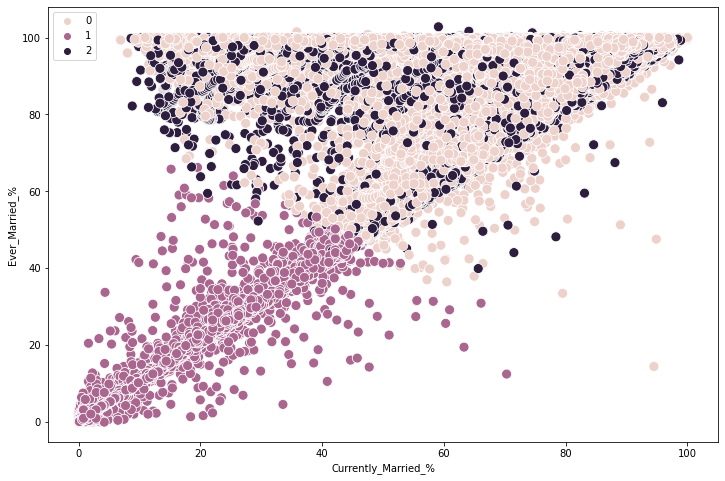

In [25]:
# Plot the clusters for the "Ever_Married_%" and "Currently_Married_%" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=em_cm_nogeo['Currently_Married_%'], y=em_cm_nogeo['Ever_Married_%'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Currently_Married_%') # Label x-axis.
plt.ylabel('Ever_Married_%') # Label y-axis.
plt.show()

#### This plot looks even more confusing, I'll stick to the 4 clusters

### 3. Evaluating the results of clustering

In [34]:
em_cm_nogeo.loc[em_cm_nogeo['clusters'] == 3, 'cluster'] = 'black'
em_cm_nogeo.loc[em_cm_nogeo['clusters'] == 2, 'cluster'] = 'dark purple'
em_cm_nogeo.loc[em_cm_nogeo['clusters'] == 1, 'cluster'] = 'mauve'
em_cm_nogeo.loc[em_cm_nogeo['clusters'] == 0, 'cluster'] = 'light pink'

In [35]:
em_cm_nogeo.groupby('cluster').agg({'Currently_Married_%':['mean', 'median'], 
                         'Ever_Married_%':['mean', 'median']})

Currently_Married_%        Ever_Married_%        
                           mean median           mean  median
cluster                                                      
black                 45.377403  47.18      69.425206  67.440
dark purple           76.560060  78.96      90.024745  91.910
light pink            78.036433  78.09      91.942390  93.700
mauve                  9.081598   4.16       9.648855   4.415

In [42]:
#comparing it to the original dataset with sex, countries, regiong, Sub-regions and age groups
em_cm.groupby('Region Name').agg({'Currently_Married_%':['mean', 'median'], 
                         'Ever_Married_%':['mean', 'median']})

Currently_Married_%        Ever_Married_%       
                           mean median           mean median
Region Name                                                 
Africa                64.038010  75.30      76.825185  93.53
Americas              54.423747  62.98      68.113971  82.70
Asia                  65.954218  78.81      77.033860  94.20
Europe                53.656006  64.36      67.702966  86.73
Oceania               59.694565  69.48      72.693612  88.73

In [39]:
#comparing it to the original dataset with sex, countries, regiong, Sub-regions and age groups
em_cm.groupby(['Region Name','Sex']).agg({'Currently_Married_%':['mean', 'median'], 
                         'Ever_Married_%':['mean', 'median']})

Currently_Married_%        Ever_Married_%        
                                 mean median           mean  median
Region Name Sex                                                    
Africa      Men             67.013367  82.60      72.660965  92.200
            Women           61.458553  69.12      80.435314  94.500
Americas    Men             57.316546  68.46      66.123976  81.900
            Women           52.005296  58.01      69.777657  83.260
Asia        Men             69.477542  85.36      74.660774  94.820
            Women           63.166003  74.58      78.911822  93.900
Europe      Men             56.237132  69.38      65.328615  84.740
            Women           51.122128  59.37      70.033854  88.265
Oceania     Men             62.275665  73.80      70.395782  87.950
            Women           57.160616  64.63      74.949465  89.750

#### based on clustering we had a groups with wery low currently married means (black 45 and mauve 9) , while based on grouping by sex and region the lowest mean we have is 51 Women and Europe. We have totally different groups by clustering and regions. Let's check the age-groups

In [43]:
#comparing it to the original dataset with sex, countries, regiong, Sub-regions and age groups
em_cm.groupby('AgeGroup').agg({'Currently_Married_%':['mean', 'median'], 
                         'Ever_Married_%':['mean', 'median']})

Currently_Married_%         Ever_Married_%        
                        mean  median           mean  median
AgeGroup                                                   
[0-14]             23.061667   0.420      24.845000   0.445
[10-14]             0.419393   0.000       0.466180   0.000
[12-14]             3.398000   3.460       3.840000   3.460
[15-19]             7.704507   2.650       8.307757   2.895
[16-19]             0.250000   0.250       0.315000   0.315
[20-24]            31.648940  27.000      33.765585  28.380
[25-29]            57.560752  61.800      61.447512  65.525
[30-34]            72.384832  76.700      78.211025  83.200
[35-39]            78.113904  80.990      85.870676  89.540
[40-44]            79.377170  81.360      89.498158  92.570
[45+]              73.980000  73.980      98.350000  98.350
[45-49]            78.910021  79.880      91.482500  93.930
[50+]              70.043571  75.900      96.790000  98.100
[50-54]            77.404098  77.650      91.543149  93.075
[55+]              65.676667  65.930      94.550556  97.025
[55-59]            75.447176  75.000      92.434120  93.630
[60+]              61.477812  64.750      95.341719  97.150
[60-64]            70.686889  70.595      92.617732  93.745
[65+]              54.944340  56.945      90.762028  95.030
[65-69]            66.226315  67.010      93.267886  94.150
[70+]              50.646803  55.980      95.450000  97.125
[70-74]            59.164286  60.260      93.141444  94.170
[75+]              44.618913  42.420      92.750068  94.010

In [44]:
#comparing it to the original dataset with sex, countries, regiong, Sub-regions and age groups
em_cm.groupby(['AgeGroup','Sex']).agg({'Currently_Married_%':['mean', 'median'], 
                         'Ever_Married_%':['mean', 'median']})

Currently_Married_%         Ever_Married_%        
                              mean  median           mean  median
AgeGroup Sex                                                     
[0-14]   Men             18.553333   0.180      21.140000   0.190
         Women           27.570000   0.660      28.550000   0.700
[10-14]  Men              0.267076   0.000       0.305354   0.000
         Women            0.568407   0.000       0.623520   0.000
[12-14]  Men              2.100000   2.100       2.370000   2.370
         Women            3.722500   3.595       4.207500   4.055
[15-19]  Men              1.722288   0.900       1.894141   1.000
         Women           12.518551   8.885      13.468958   9.400
[16-19]  Men              0.160000   0.160       0.180000   0.180
         Women            0.340000   0.340       0.450000   0.450
[20-24]  Men             17.833181  16.580      18.773528  17.300
         Women           42.850522  45.610      45.920889  48.735
[25-29]  Men             47.779146  50.830      50.097590  53.350
         Women           65.491330  70.300      70.649626  76.590
[30-34]  Men             68.403726  72.910      72.234095  77.270
         Women           75.623255  79.000      83.072948  87.720
[35-39]  Men             77.527798  81.500      82.643199  86.800
         Women           78.589952  80.650      88.492101  91.990
[40-44]  Men             81.106390  84.430      87.577698  90.420
         Women           77.964257  79.570      91.067331  93.670
[45+]    Men             90.130000  90.130      98.190000  98.190
         Women           57.830000  57.830      98.510000  98.510
[45-49]  Men             82.626844  85.245      90.187787  92.460
         Women           75.873089  76.910      92.540382  94.720
[50+]    Men             86.337143  87.940      97.797143  97.400
         Women           53.750000  53.840      95.782857  98.800
[50-54]  Men             82.762920  84.560      91.402709  92.800
         Women           71.405249  72.330      91.700361  93.280
[55+]    Men             85.190000  85.170      97.465556  97.990
         Women           46.163333  45.590      91.635556  95.370
[55-59]  Men             83.031596  84.010      92.509875  93.605
         Women           67.113529  68.470      92.350882  93.670
[60+]    Men             79.909688  80.635      95.765000  97.180
         Women           43.045938  44.725      94.918437  96.725
[60-64]  Men             81.637099  82.320      92.679498  93.560
         Women           59.630367  60.585      92.555367  93.885
[65+]    Men             74.792190  74.850      92.572095  95.990
         Women           35.467477  34.290      88.985794  94.300
[65-69]  Men             80.365942  80.565      93.465300  94.040
         Women           52.129823  52.900      93.071074  94.300
[70+]    Men             74.511475  74.070      96.404098  98.000
         Women           26.782131  25.010      94.495902  96.000
[70-74]  Men             76.939332  77.355      93.691986  94.385
         Women           41.446176  41.630      92.592665  93.950
[75+]    Men             66.370511  65.700      93.873213  94.870
         Women           22.965296  22.515      91.631982  92.915

#### With this kind of grouping an aggregating, we have more groups than with clustering, but it is easier to map age groups to cluster, which leads to the insight that age group is more important determing factor than Regions